In [ ]:
import numpy as np 
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def matrix(y_true, y_pred):
    print(classification_report(y_test,pred))
    
    cmat = confusion_matrix(y_test,pred)
    print('TN - True Negative {}'.format(cmat[0,0]))
    print('FP - False Positive {}'.format(cmat[0,1]))
    print('FN - False Negative {}'.format(cmat[1,0]))
    print('TP - True Positive {}'.format(cmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))
    
    return 0

In [ ]:
%cd "./drive/My Drive/Data Mining Project"
data = pd.read_csv('weatherAUS.csv', parse_dates = ['Date'])

/content/drive/.shortcut-targets-by-id/1ne0CUvbC7Jk3-VdZvzFpZJJJFoFf7n9f/Data Mining Project


In [ ]:
print(data.shape)
print(data.head(366))

(145460, 23)
          Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0   2008-12-01   Albury     13.4  ...     21.8         No            No
1   2008-12-02   Albury      7.4  ...     24.3         No            No
2   2008-12-03   Albury     12.9  ...     23.2         No            No
3   2008-12-04   Albury      9.2  ...     26.5         No            No
4   2008-12-05   Albury     17.5  ...     29.7         No            No
..         ...      ...      ...  ...      ...        ...           ...
361 2009-11-27   Albury     15.9  ...     24.7        Yes            No
362 2009-11-28   Albury     17.1  ...     25.7         No           Yes
363 2009-11-29   Albury     12.8  ...     20.7        Yes           Yes
364 2009-11-30   Albury     13.2  ...     23.6        Yes            No
365 2009-12-01   Albury     12.3  ...     22.6         No            No

[366 rows x 23 columns]


In [ ]:
data.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

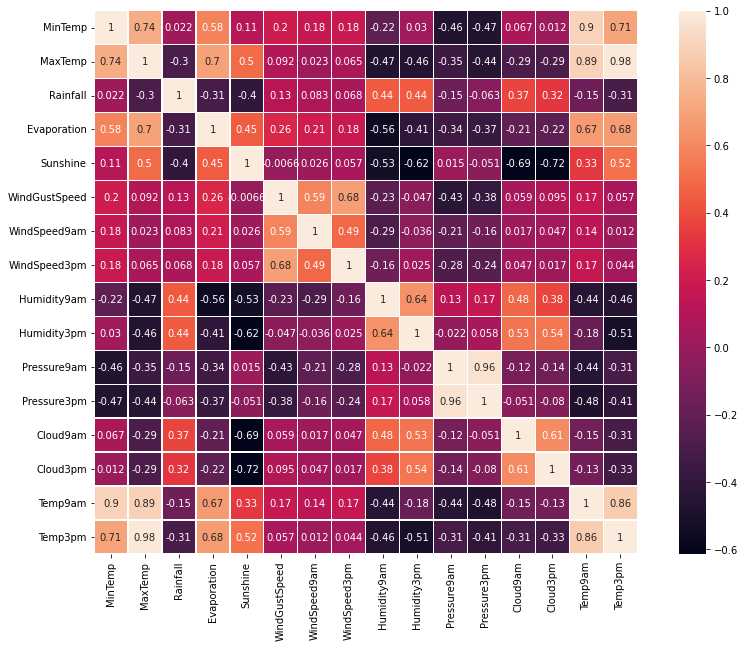

In [ ]:
import seaborn as sns
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(method = 'spearman'), robust = True, linewidths = .6, square = True, annot = True);

#### **Temp9am**

Text(0, 0.5, 'Temperature in Celsius')

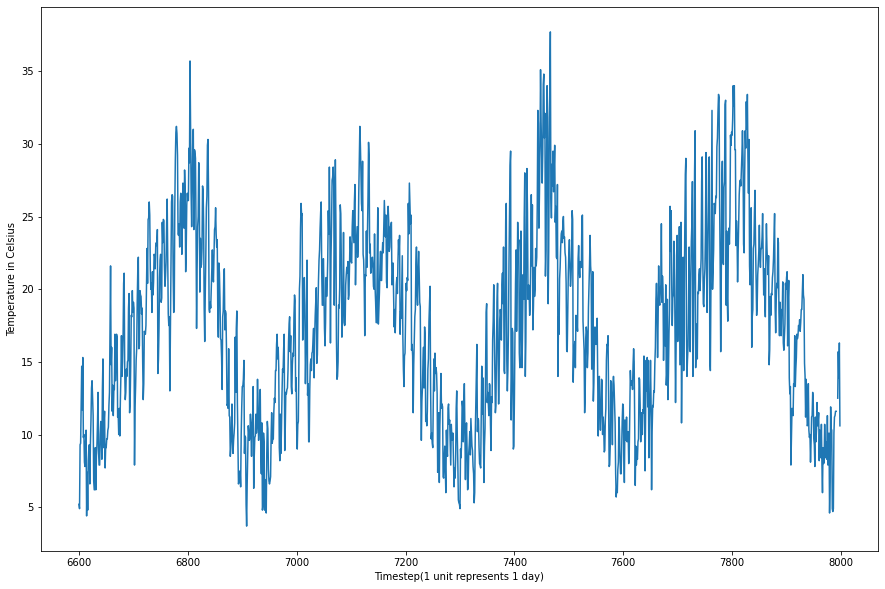

In [ ]:
plt.figure(figsize = (15, 10))
mintemp = data["Temp9am"][6600:8000].plot()
#mintemp = data["MinTemp"].plot()
mintemp.set_xlabel("Timestep(1 unit represents 1 day)")
mintemp.set_ylabel("Temperature in Celsius")

**MinTemp**

Text(0, 0.5, 'Min Temperature in Celsius')

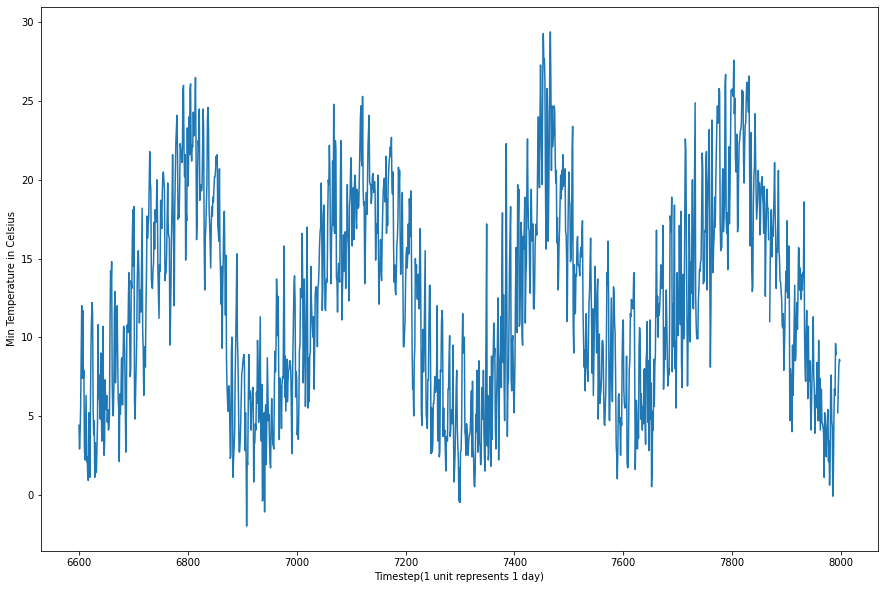

In [ ]:
plt.figure(figsize = (15, 10))
mintemp = data["MinTemp"][6600:8000].plot()
#mintemp = data["MinTemp"].plot()
mintemp.set_xlabel("Timestep(1 unit represents 1 day)")
mintemp.set_ylabel("Min Temperature in Celsius")

In [ ]:
min_temp = data["MinTemp"]
print(min_temp.isna().sum())

1485


In [ ]:
min_temp = min_temp.fillna(min_temp.mean())
print(min_temp.isna().sum())

0


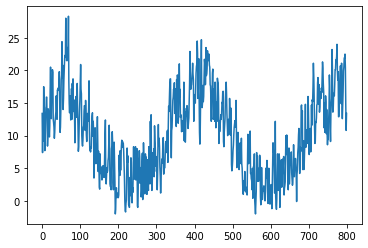

In [ ]:
min_temp[:800].plot()

**MaxTemp**

Text(0, 0.5, 'Max Temperature in Celsius')

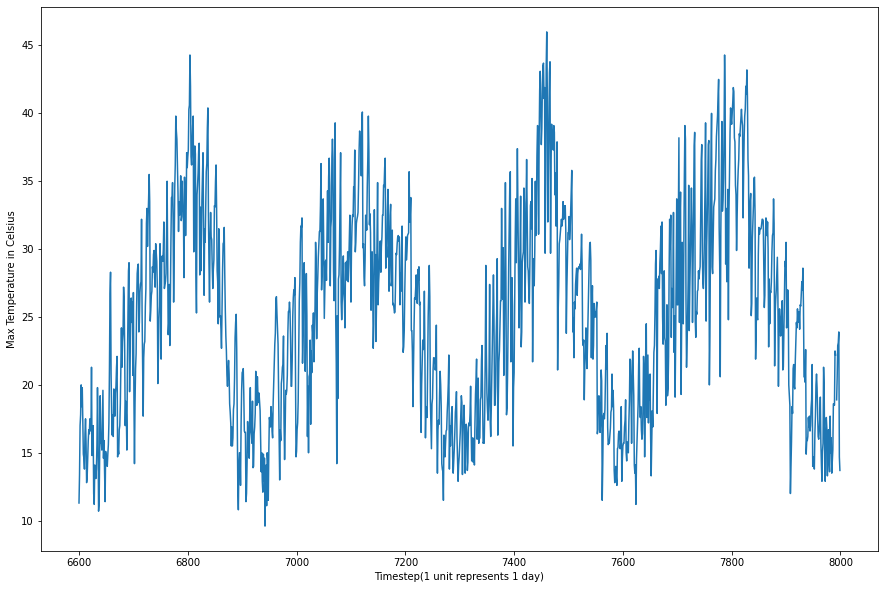

In [ ]:
plt.figure(figsize = (15, 10))
maxtemp = data["MaxTemp"][6600:8000].plot()
#mintemp = data["MaxTemp"][:366].plot()
maxtemp.set_xlabel("Timestep(1 unit represents 1 day)")
maxtemp.set_ylabel("Max Temperature in Celsius")

In [ ]:
max_temp = data["MaxTemp"]
print(max_temp.isna().sum())

1261


In [ ]:
max_temp = max_temp.fillna(max_temp.mean())
print(max_temp.isna().sum())

0


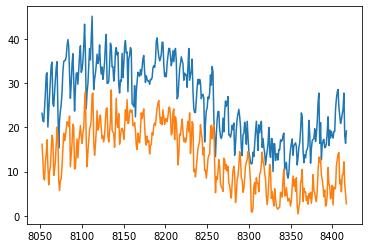

In [ ]:
max_temp[8052:8418].plot()
min_temp[8052:8418].plot()

**Temp3pm**

Text(0, 0.5, 'Temperature at 3pm in Celsius')

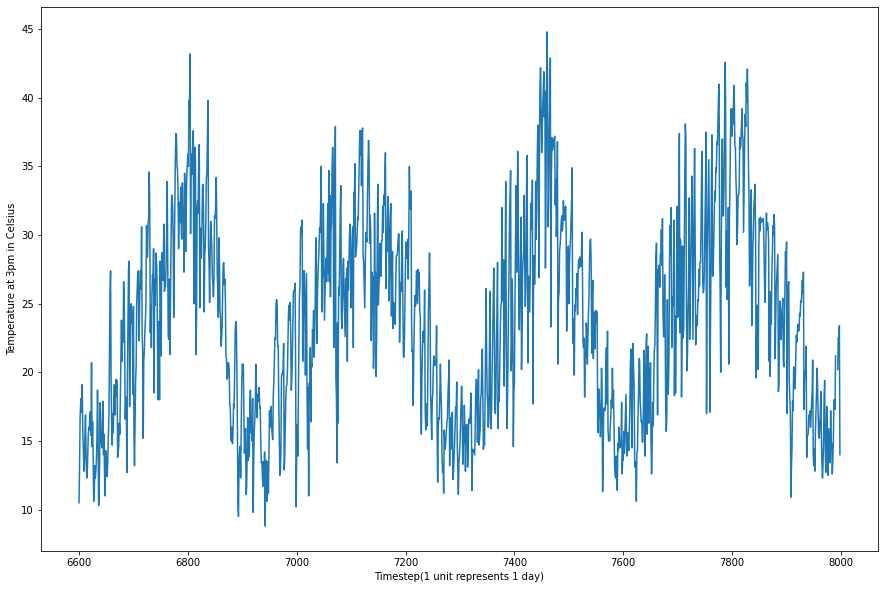

In [ ]:
plt.figure(figsize = (15, 10))
maxtemp_3pm = data["Temp3pm"][6600:8000].plot()
#mintemp = data["MaxTemp"][:366].plot()
maxtemp_3pm.set_xlabel("Timestep(1 unit represents 1 day)")
maxtemp_3pm.set_ylabel("Temperature at 3pm in Celsius")

In [ ]:
maxtemp_3pm = data["Temp3pm"]
print(maxtemp_3pm.isna().sum())

3609


In [ ]:
maxtemp_3pm = maxtemp_3pm.fillna(maxtemp_3pm.mean())
print(maxtemp_3pm.isna().sum())

0


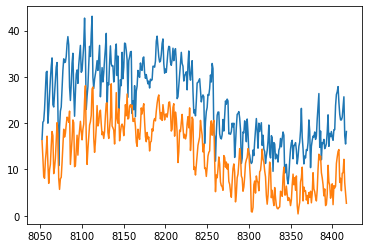

In [ ]:
maxtemp_3pm[8052:8418].plot()
min_temp[8052:8418].plot()

**Evaporation**

Text(0, 0.5, 'Evaporation in mm')

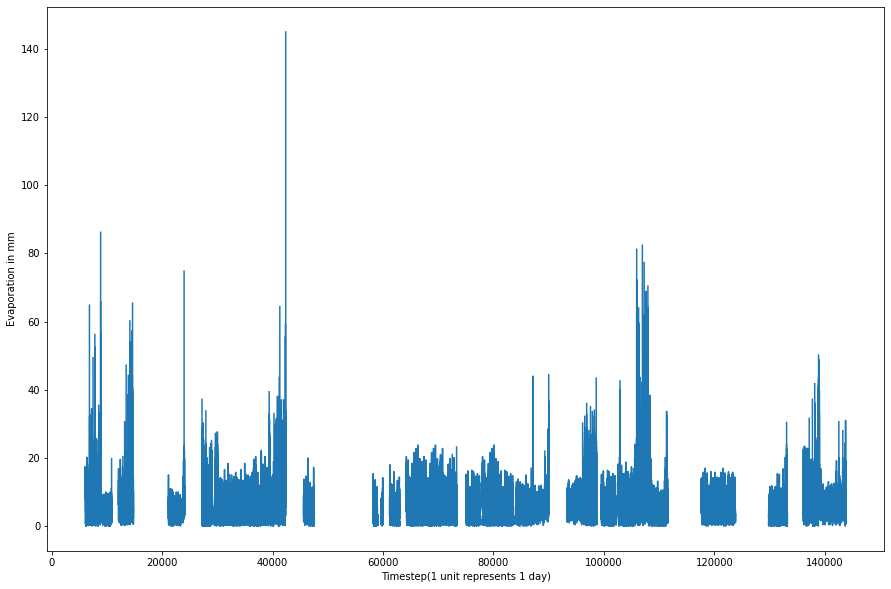

In [ ]:
plt.figure(figsize = (15, 10))
evaporation = data["Evaporation"].plot()
evaporation.set_xlabel("Timestep(1 unit represents 1 day)")
evaporation.set_ylabel("Evaporation in mm")

Text(0, 0.5, 'Evaporation in mm')

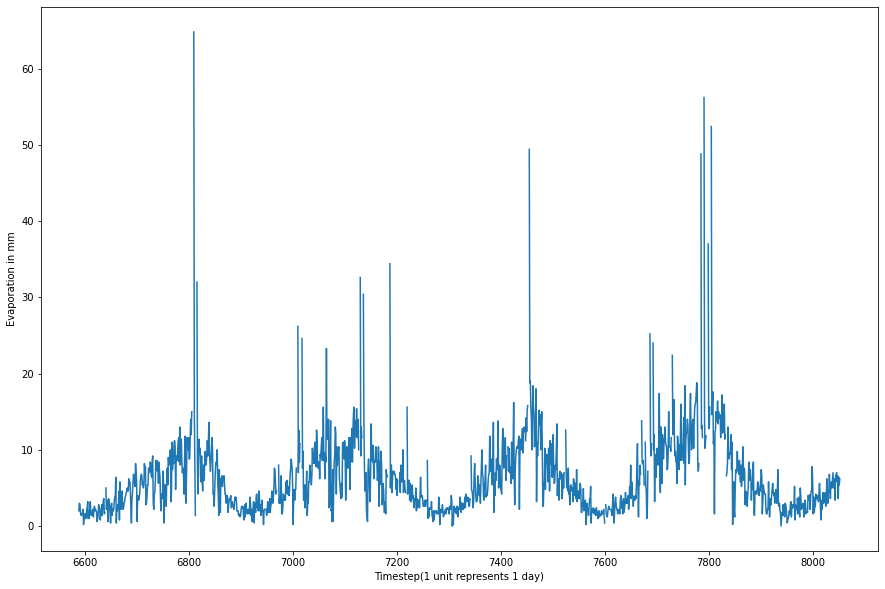

In [ ]:
plt.figure(figsize = (15, 10))
evaporation_total = data["Evaporation"][6588:8052].plot()
evaporation_total.set_xlabel("Timestep(1 unit represents 1 day)")
evaporation_total.set_ylabel("Evaporation in mm")

Text(0, 0.5, 'Units')

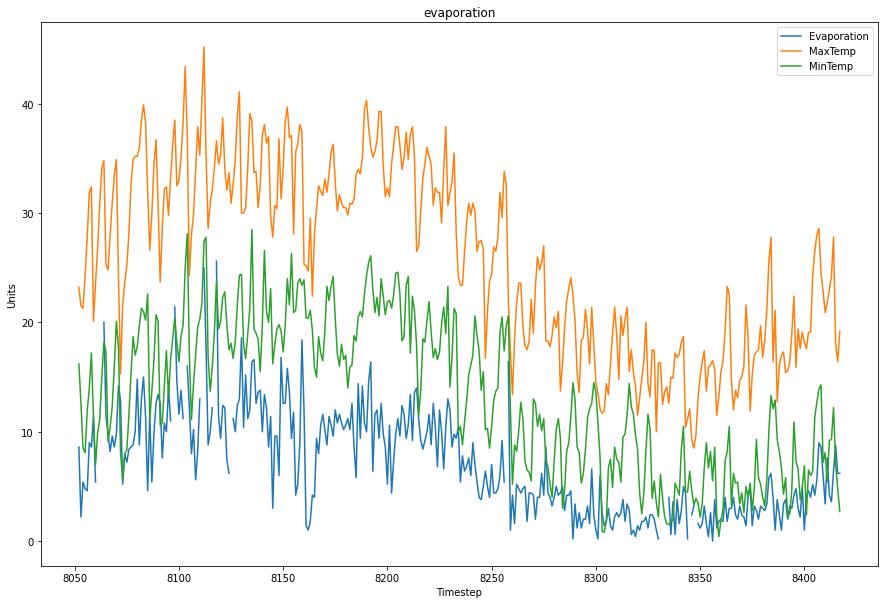

In [ ]:
plt.figure(figsize = (15, 10))
evaporation = data["Evaporation"][8052:8418].plot(title = "evaporation", legend = True)
max_temp[8052:8418].plot(legend = True)
min_temp[8052:8418].plot(legend = True)
evaporation.set_xlabel("Timestep")
evaporation.set_ylabel("Units")

Text(0, 0.5, 'Units')

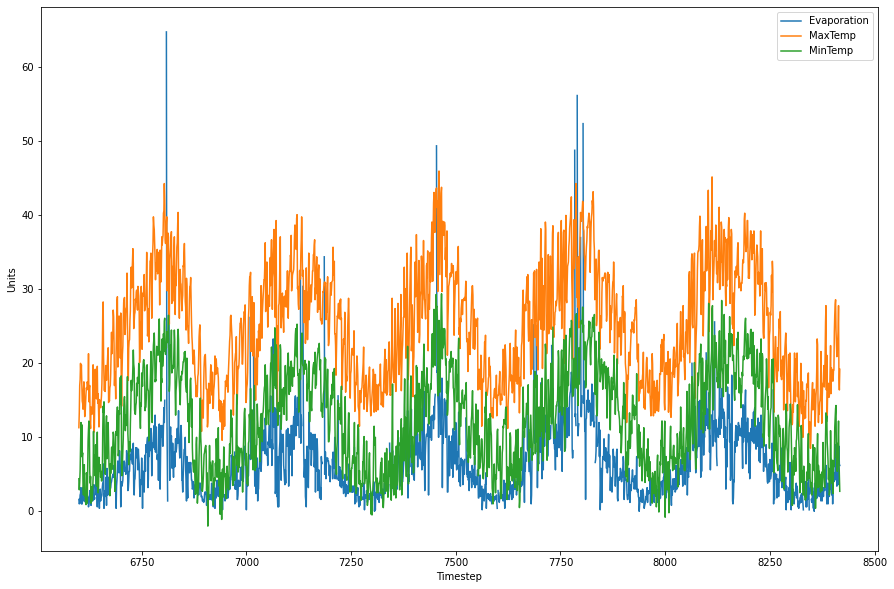

In [ ]:
plt.figure(figsize = (15, 10))
evaporation = data["Evaporation"][6600:8418].plot(legend = True)
max_temp[6600:8418].plot(legend = True)
min_temp[6600:8418].plot(legend = True)
evaporation.set_xlabel("Timestep")
evaporation.set_ylabel("Units")

In [ ]:
evaporation = data["Evaporation"]
print(evaporation.head())
evaporation_arr = list(evaporation) 

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Evaporation, dtype: float64


In [ ]:
boolean = evaporation.isnull()
print(boolean.head())
boolean_arr = list(boolean)

0    True
1    True
2    True
3    True
4    True
Name: Evaporation, dtype: bool


In [ ]:
max_temp = list(max_temp)
min_temp = list(min_temp)
print("max_temp shape {}".format(len(max_temp)))
print("min_temp shape {}".format(len(min_temp)))
print("evaporation_arr shape {}".format(len(evaporation_arr)))
print("boolean_arr shape {}".format(len(boolean_arr)))

max_temp shape 145460
min_temp shape 145460
evaporation_arr shape 145460
boolean_arr shape 145460


In [ ]:
max_temp = np.asarray(max_temp)
min_temp = np.asarray(min_temp)
evaporation_arr = np.asarray(evaporation_arr)
boolean_arr = np.asarray(boolean_arr)

In [ ]:
dataframe_test = pd.DataFrame({"max_temp": max_temp, "min_temp": min_temp, "evaporation_arr": evaporation_arr, "boolean_arr": boolean_arr})

dataframe_test.head(15)

,max_temp,min_temp,evaporation_arr,boolean_arr
0,22.9,13.4,NaN,True
1,25.1,7.4,NaN,True
2,25.7,12.9,NaN,True
3,28.0,9.2,NaN,True
4,32.3,17.5,NaN,True
5,29.7,14.6,NaN,True
6,25.0,14.3,NaN,True
7,26.7,7.7,NaN,True
8,31.9,9.7,NaN,True
9,30.1,13.1,NaN,True


In [ ]:
dataset = []
for index, row in dataframe_test.iterrows():
  if row["boolean_arr"]==False:
    dataset.append([row["max_temp"], row["min_temp"], row["evaporation_arr"]])


dataset = np.asarray(dataset)
print(dataset.shape)

(82670, 3)


In [ ]:
dataframe_test = pd.DataFrame({"max_temp": dataset[:, 0], "min_temp": dataset[:, 1], "evaporation_arr": dataset[:, 2]})
print(dataframe_test.isna().sum())
dataframe_test.head(15)

max_temp           0
min_temp           0
evaporation_arr    0
dtype: int64


,max_temp,min_temp,evaporation_arr
0,35.2,17.9,12.0
1,28.9,18.4,14.8
2,34.1,15.5,12.6
3,37.6,19.4,10.8
4,38.4,21.9,11.4
5,41.0,24.2,11.2
6,36.1,27.1,13.0
7,34.0,23.3,9.8
8,34.2,16.1,14.6
9,35.5,19.0,12.0


In [ ]:
mean_evaporation = data["Evaporation"].mean()
print(mean_evaporation)
print(dataframe_test["evaporation_arr"].mean())

5.468231522922464
5.468231522922464


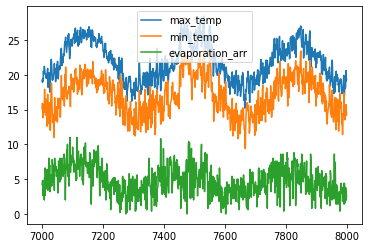

In [ ]:
dataframe_test[7000:8000].plot()

In [ ]:
trainX = dataframe_test
y = trainX["evaporation_arr"]
X = trainX.drop(['evaporation_arr'], axis=1)
X.head()

,max_temp,min_temp
0,35.2,17.9
1,28.9,18.4
2,34.1,15.5
3,37.6,19.4
4,38.4,21.9


In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [ ]:
predict_evaporation = regressor.predict(X)
predict_evaporation.mean()

5.468231522922464

In [ ]:
actual_evaporation = np.asarray(dataframe_test["evaporation_arr"])
actual_evaporation.mean()

5.468231522922463

In [ ]:
mae = abs(actual_evaporation - predict_evaporation)
print(mae.mean())

2.07207003417117


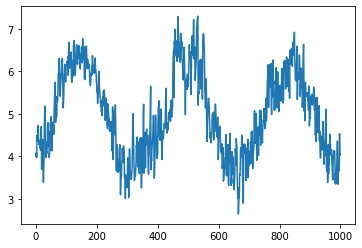

In [ ]:
plt.plot(predict_evaporation[7000:8000])

In [ ]:
"""
plt.figure(figsize = (15, 10))
simulated_evaporation = dataframe_test["max_temp"] - 18.0
simulated_evaporation[7000:8000].plot()
dataframe_test["evaporation_arr"][7000:8000].plot()
"""

'\nplt.figure(figsize = (15, 10))\nsimulated_evaporation = dataframe_test["max_temp"] - 18.0\nsimulated_evaporation[7000:8000].plot()\ndataframe_test["evaporation_arr"][7000:8000].plot()\n'

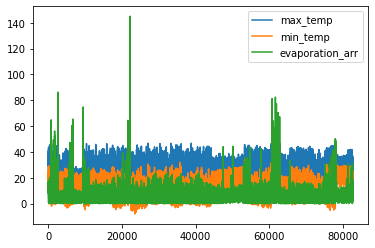

In [ ]:
dataframe_test.plot()

In [ ]:
"""
mae = abs(simulated_evaporation[7000:8000] - dataframe_test["evaporation_arr"][7000:8000])
print(mae.mean())
print(simulated_evaporation.isna().sum())
"""

'\nmae = abs(simulated_evaporation[7000:8000] - dataframe_test["evaporation_arr"][7000:8000])\nprint(mae.mean())\nprint(simulated_evaporation.isna().sum())\n'

In [ ]:
imputed_dataset = data.copy()
imputed_dataset["MinTemp"] = imputed_dataset["MinTemp"].fillna(imputed_dataset["MinTemp"].mean())
imputed_dataset["MaxTemp"] = imputed_dataset["MaxTemp"].fillna(imputed_dataset["MaxTemp"].mean())

In [ ]:
imputed_dataset.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
import numpy as np

imputed_dataset = imputed_dataset.fillna(np.nan)

In [ ]:
maxtemp_arr = imputed_dataset["MaxTemp"]
mintemp_arr = imputed_dataset["MinTemp"]
evapo_arr = imputed_dataset["Evaporation"]
bool_arr = evapo_arr.isna()
for i in range(len(bool_arr)):
  if bool_arr[i]==True:
    x = np.asarray([maxtemp_arr[i], mintemp_arr[i]]).reshape(1, 2)
    predict_evaporation = regressor.predict(x)[0]
    evapo_arr[i] = max(0, predict_evaporation)


evapo_arr.head()

0    5.172745
1    5.614985
2    6.047437
3    6.622200
4    8.361720
Name: Evaporation, dtype: float64

Text(0, 0.5, 'Evaporation in Milli Meters(mm)')

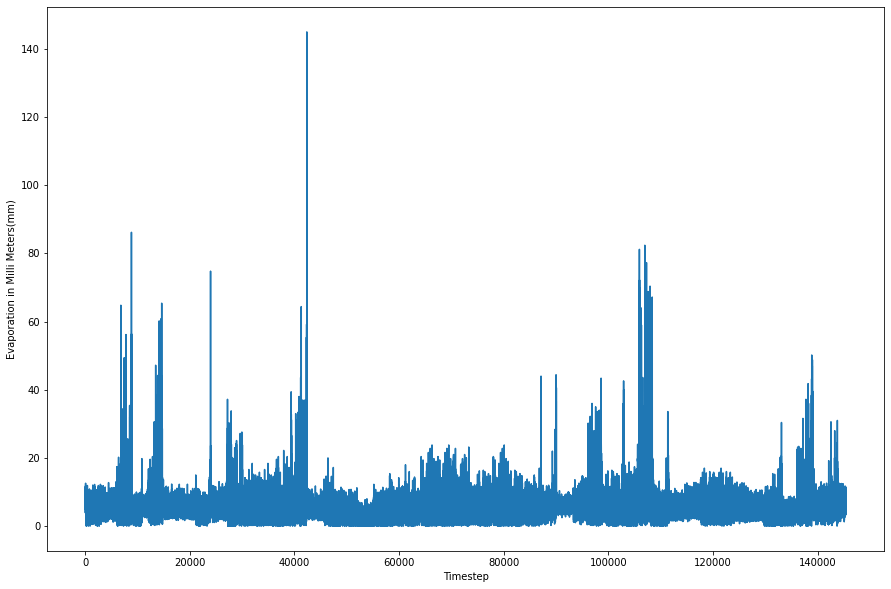

In [ ]:
plt.figure(figsize = (15, 10))
evapo_arr.plot()
plt.xlabel("Timestep")
plt.ylabel("Evaporation in Milli Meters(mm)")
#evapo_arr.set_xlabel("Timestep")
#evapo_arr.set_ylabel("Evaporation in Milli Meters(mm)")

Text(0, 0.5, 'Evaporation in Milli Meters(mm)')

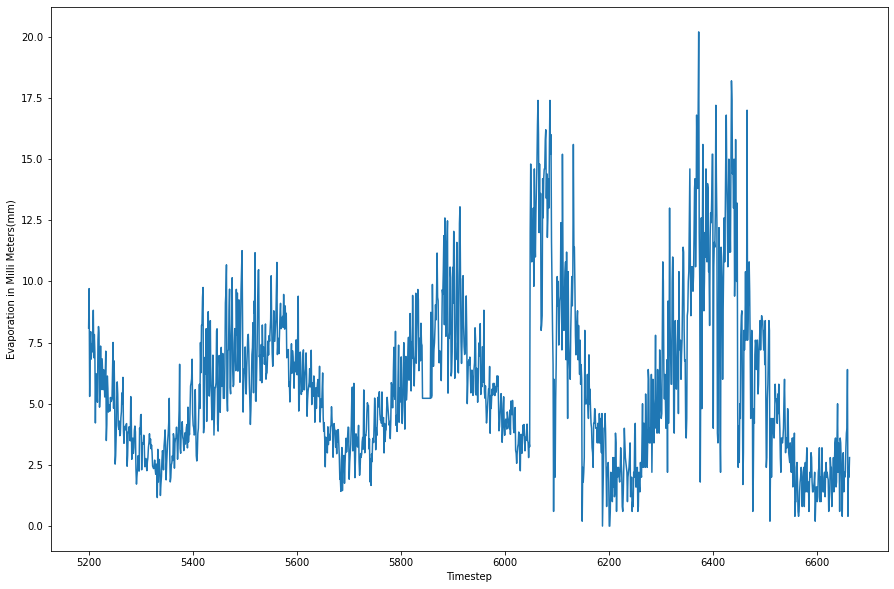

In [ ]:
plt.figure(figsize= (15, 10))
evapo_arr[5200:6664].plot()
plt.xlabel("Timestep")
plt.ylabel("Evaporation in Milli Meters(mm)")

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Evaporation, dtype: float64


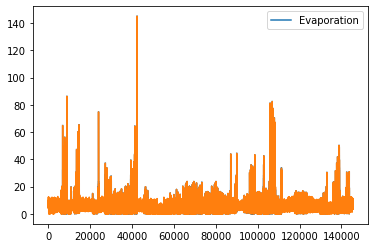

In [ ]:
real_evaporation = data["Evaporation"]
print(real_evaporation.head())
real_evaporation.plot(legend = True)
evapo_arr.plot()



In [ ]:
imputed_dataset.drop(labels = ["Evaporation"], axis = 1, inplace = True)

In [ ]:
imputed_dataset["Evaporation"] = evapo_arr

In [ ]:
imputed_dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Evaporation
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,5.172745
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,5.614985
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,6.047437
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,6.622200
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,8.361720


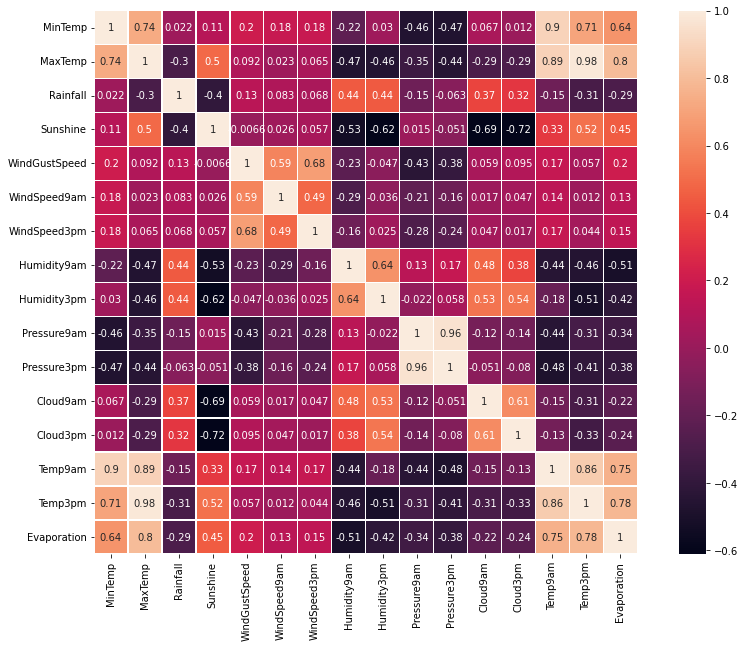

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(imputed_dataset.corr(method = 'spearman'), robust = True, linewidths = .6, square = True, annot = True);

In [ ]:
dataframe_test = pd.DataFrame({"max_temp": imputed_dataset["MaxTemp"], "min_temp": imputed_dataset["MinTemp"], "evaporation_arr": imputed_dataset["Evaporation"]})
print(dataframe_test.isna().sum())
dataframe_test.head(15)

max_temp           0
min_temp           0
evaporation_arr    0
dtype: int64


,max_temp,min_temp,evaporation_arr
0,22.9,13.4,5.172745
1,25.1,7.4,5.614985
2,25.7,12.9,6.047437
3,28.0,9.2,6.622200
4,32.3,17.5,8.361720
5,29.7,14.6,7.402495
6,25.0,14.3,5.884478
7,26.7,7.7,6.140403
8,31.9,9.7,7.892802
9,30.1,13.1,7.465026


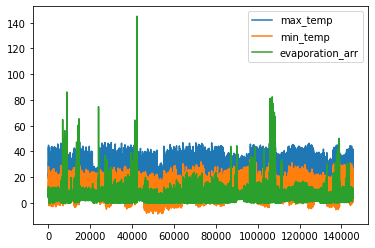

In [ ]:
dataframe_test.plot()

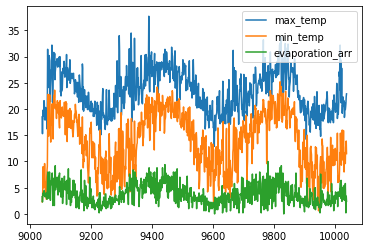

In [ ]:
import random
random_int = random.randint(0, 10000)
dataframe_test[random_int:random_int + 1000].plot()

##Saving the dataset

In [ ]:
imputed_dataset.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          3261
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Evaporation          0
dtype: int64

In [ ]:
imputed_dataset.to_csv(r'/content/dataset.csv')

# Data Analysis

In [ ]:
data.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
38403,2014-05-18,WaggaWagga,11.1,19.8,0.0,1.8,2.3,E,19.0,E,ENE,13.0,11.0,79.0,61.0,1028.7,1025.6,7.0,7.0,12.7,19.0,No,No
3646,2010-08-30,BadgerysCreek,7.9,19.8,0.0,NaN,NaN,E,33.0,NaN,NNE,0.0,7.0,67.0,47.0,1027.8,1023.8,NaN,NaN,13.9,18.5,No,No
104138,2013-08-02,Nuriootpa,5.8,13.5,0.1,2.9,NaN,W,72.0,W,WSW,35.0,31.0,89.0,79.0,1016.0,1017.3,6.0,8.0,11.2,11.7,No,Yes
127575,2011-01-14,Walpole,15.6,21.8,0.2,NaN,NaN,WSW,46.0,WSW,WSW,26.0,24.0,49.0,47.0,1006.0,1008.1,NaN,NaN,19.2,20.4,No,No
64311,2009-05-01,MelbourneAirport,7.7,15.3,0.0,3.8,0.3,N,50.0,N,SSE,31.0,4.0,49.0,71.0,1023.0,1022.6,7.0,7.0,10.9,13.0,No,No


In [ ]:
## check distribution of labels
print(data['RainTomorrow'].value_counts())
print(data['RainToday'].value_counts())

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64
No     110319
Yes     31880
Name: RainToday, dtype: int64


In [ ]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

### Analysis

**The class distribution is skewed**

In [ ]:
data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [ ]:
data_nonan_labels = data[data['RainTomorrow'].notna()]
data_nonan_labels.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
obj = data_nonan_labels.select_dtypes(include = ['O'])
num_cols = set(data.columns) - set(obj.columns)
obj_cols = set(obj.columns)

In [ ]:
data_nonan_labels.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

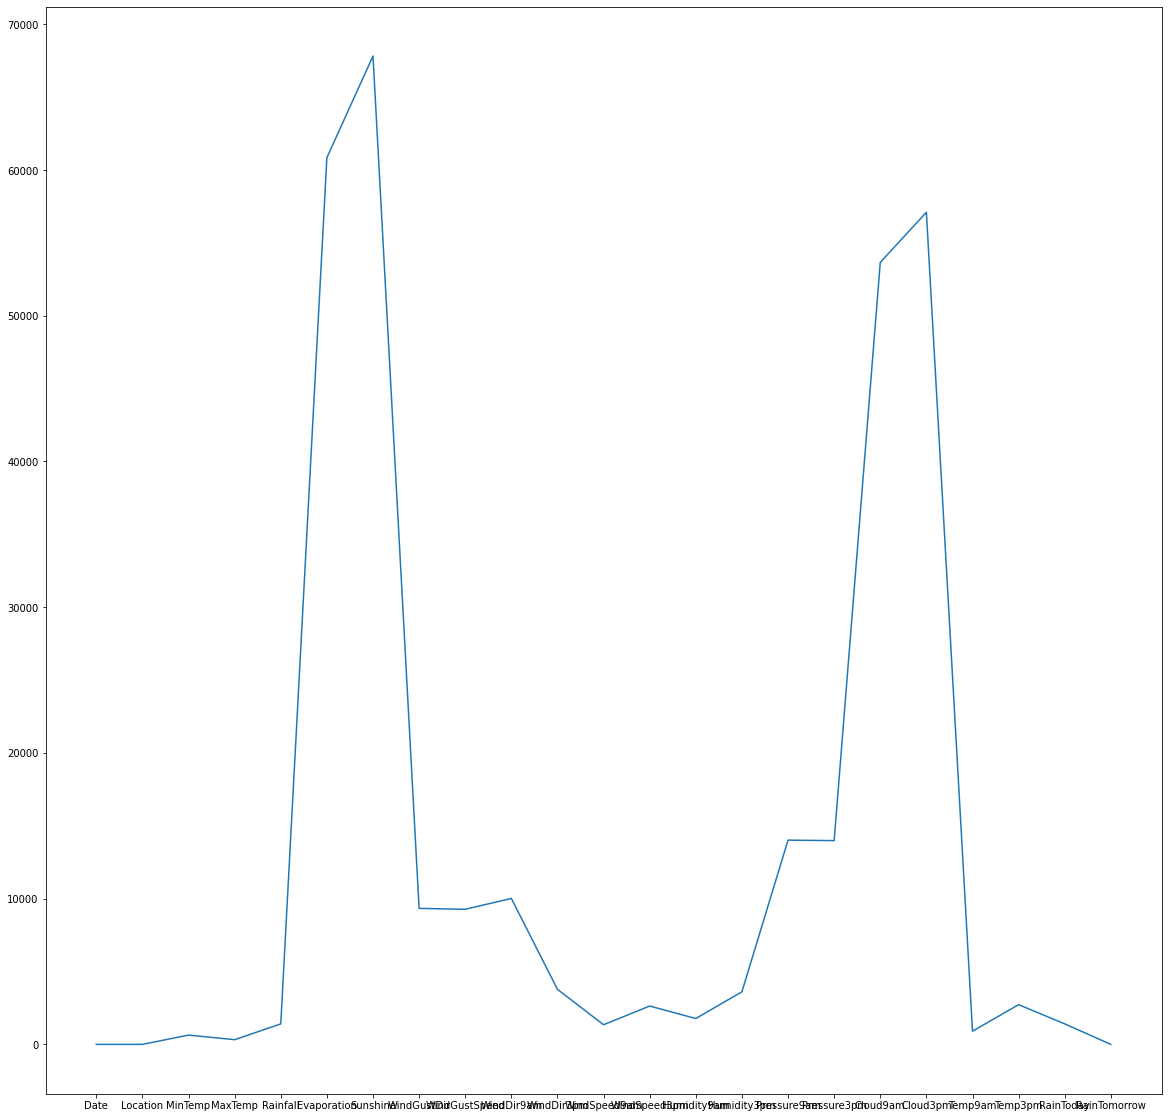

In [ ]:
nulls = pd.DataFrame(data_nonan_labels.isnull().sum(), columns = ['nulls'])
plt.figure(figsize = (20, 20))
plt.plot(nulls.index, nulls['nulls'])

In [ ]:
## remove rows that have empty entries
column_names = list(data_nonan_labels.columns)

for column_name in column_names:
    data_nonan_labels = data_nonan_labels[data_nonan_labels[column_name] != ' '] 
print(data_nonan_labels.shape)

(142193, 23)


In [ ]:
## check distribution of labels post preprocess
print(data_nonan_labels['RainTomorrow'].value_counts())
print(data_nonan_labels['RainToday'].value_counts())

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64
No     109332
Yes     31455
Name: RainToday, dtype: int64


In [ ]:
data_nonan_labels.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Handling Categorical attributes**

In [ ]:
## convert object columns to labels
def encode_labels(data,c1):
    from sklearn import preprocessing
    # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()
 
    # Encode labels in column 'species'.
    data[c1]= label_encoder.fit_transform(data[c1].astype(str))
 
    data[c1].unique()
    return data

for column_name in column_names:
    if data_nonan_labels[column_name].dtype == object:
        data_nonan_labels = encode_labels(data_nonan_labels,column_name)

In [ ]:
data_nonan_labels.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [ ]:
data_nonan_labels.dtypes

Date             datetime64[ns]
Location                  int64
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir               int64
WindGustSpeed           float64
WindDir9am                int64
WindDir3pm                int64
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                 int64
RainTomorrow              int64
dtype: object

In [ ]:
data_nonan_labels.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

## Preprocessing

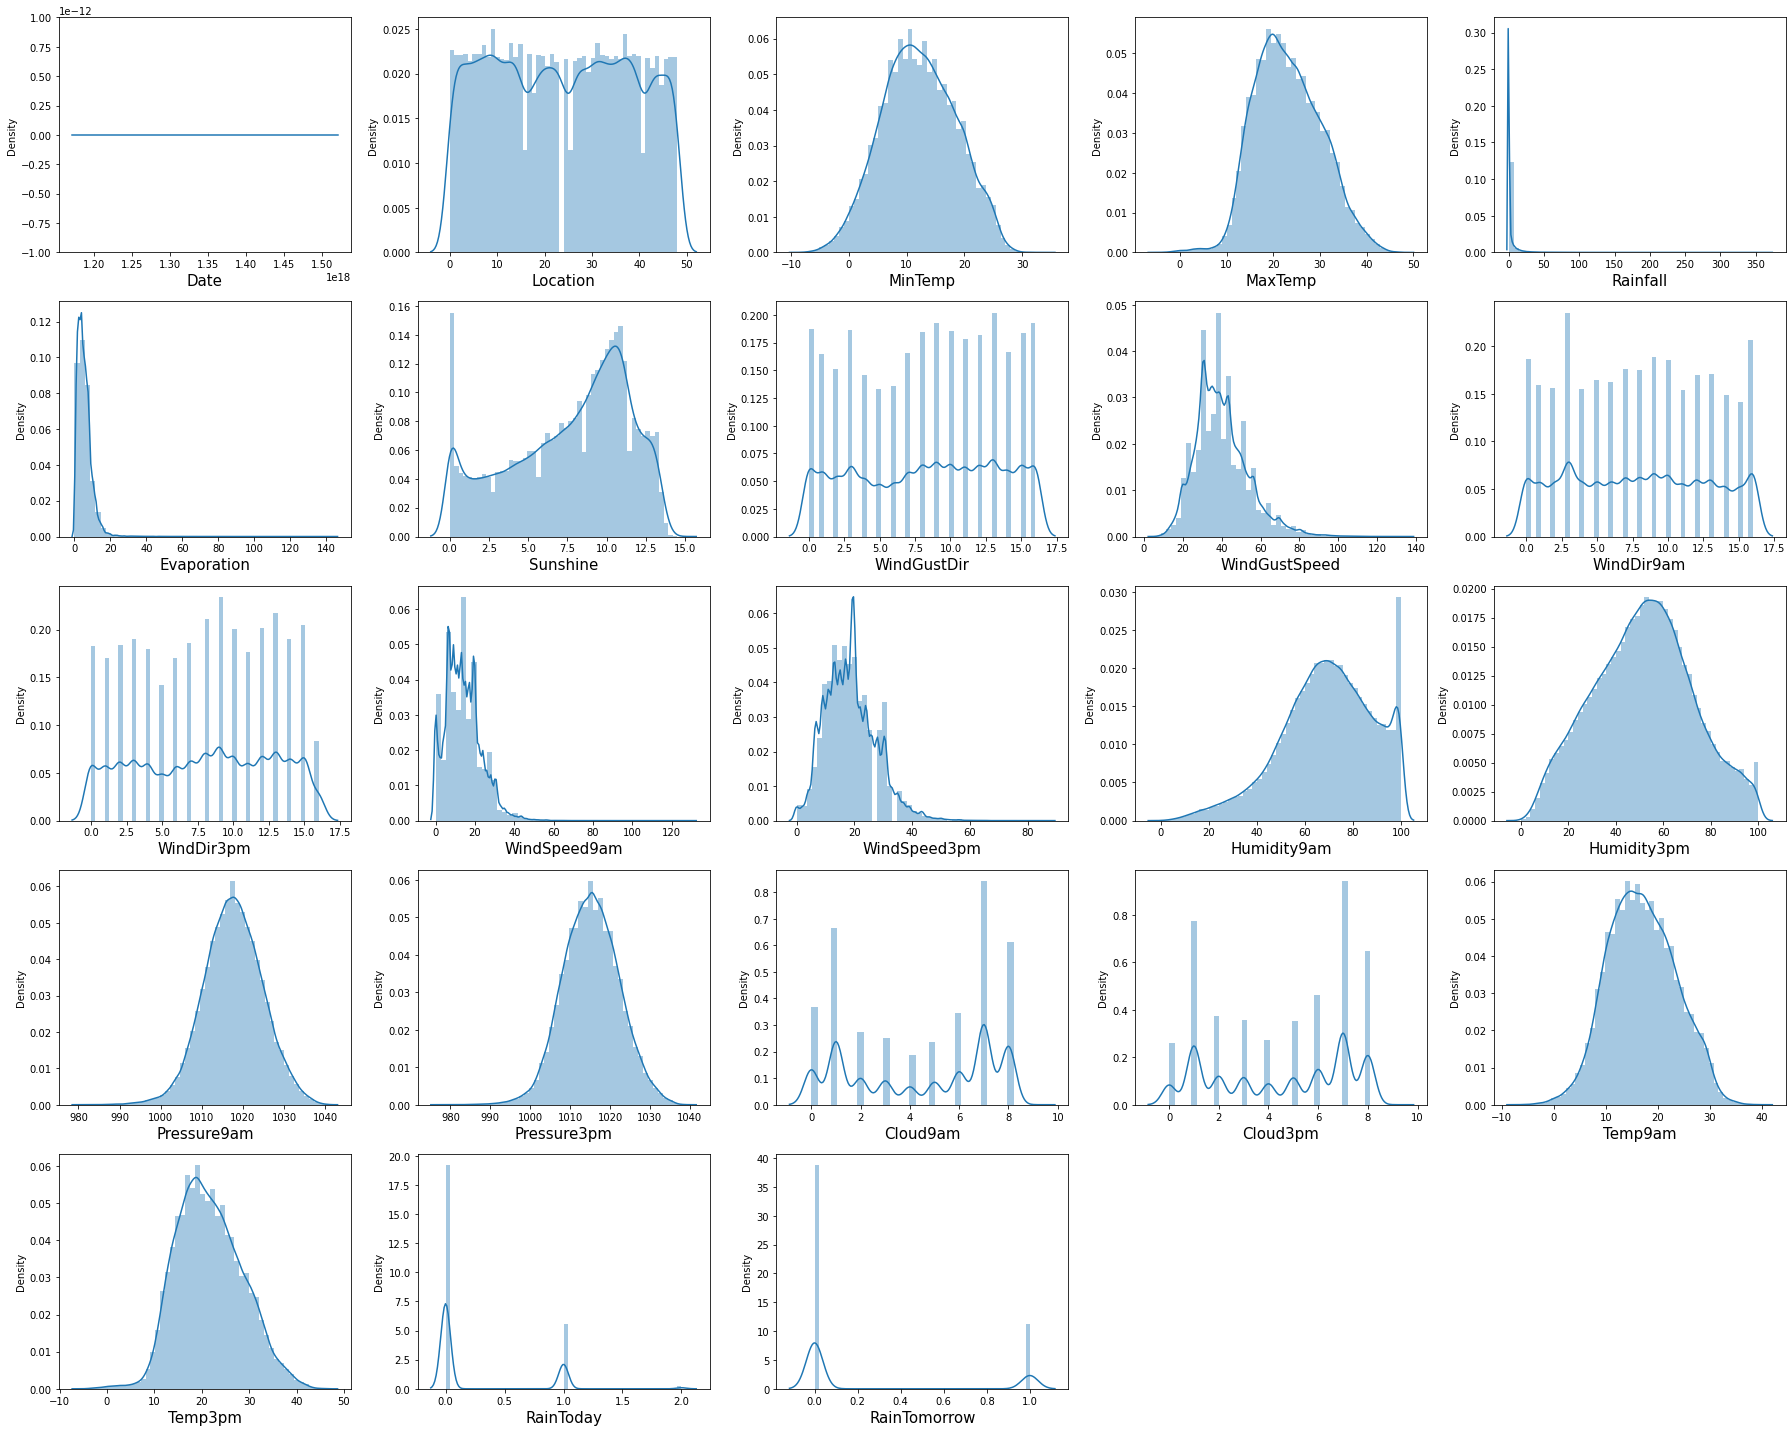

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in data_nonan_labels.columns:
    if plotnumber <= len(data_nonan_labels.columns) + 1:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(data_nonan_labels[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [ ]:
data_nonan_labels['RainTomorrow'].value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [ ]:
data_nonan_labels.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [ ]:
data_nonan_labels.drop("Date", 1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,NaN,NaN,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0,0
145455,41,2.8,23.4,0.0,NaN,NaN,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
145456,41,3.6,25.3,0.0,NaN,NaN,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
145457,41,5.4,26.9,0.0,NaN,NaN,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0


In [ ]:
"""
fig, axs = plt.subplots(int(len(num_cols)/5), 5, figsize = (15, 15),
                       squeeze = False)

for name, ax in zip(num_cols, axs.flatten()):
    sns.boxplot(y=name, x= 'RainTomorrow', data=data_nonan_labels,
                orient='v', ax=ax)
plt.tight_layout()
"""

"\nfig, axs = plt.subplots(int(len(num_cols)/5), 5, figsize = (15, 15),\n                       squeeze = False)\n\nfor name, ax in zip(num_cols, axs.flatten()):\n    sns.boxplot(y=name, x= 'RainTomorrow', data=data_nonan_labels,\n                orient='v', ax=ax)\nplt.tight_layout()\n"

**Outlier Detection**

In [ ]:
from collections import Counter

# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
col_list = ["MinTemp","MaxTemp","Rainfall", "Evaporation", "Sunshine","WindGustSpeed","WindSpeed9am" ,"WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]
#col_list = []
#for col in data_nonan_labels:
#  col_list.append(col)
Outliers_to_drop = detect_outliers(data_nonan_labels, 2, col_list)

data_nonan_labels.loc[Outliers_to_drop] # Show the outliers rows


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [ ]:
data_nonan_labels.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

# EDA(Exploratory Data Analysis on Features)

**Intersting exploration**

**Min Temp**



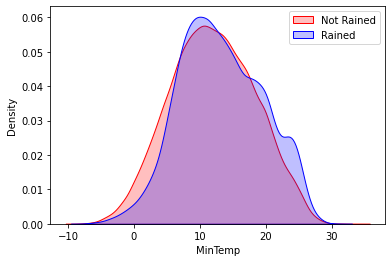

In [ ]:
# Explore Mintemp distribution 
g = sns.kdeplot(data_nonan_labels["MinTemp"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["MinTemp"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["MinTemp"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["MinTemp"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("MinTemp")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

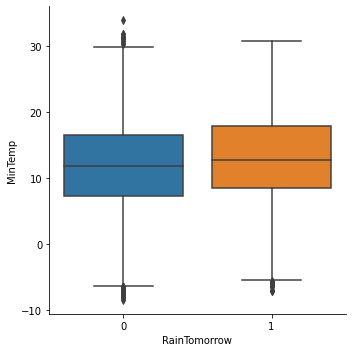

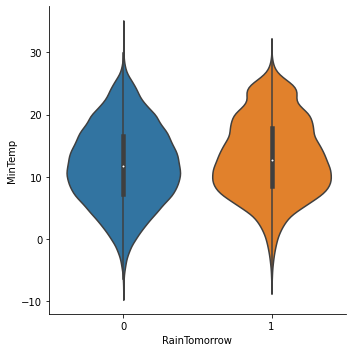

In [ ]:
g = sns.factorplot(x="RainTomorrow", y = "MinTemp",data = data_nonan_labels, kind="box")
g = sns.factorplot(x="RainTomorrow", y = "MinTemp",data = data_nonan_labels, kind="violin")

**Inference**: We see that there is a higher chance of raining when the temperature is higher, this could be due to more evaporation. We can notice that by looking at the density plot with min temperatures from [18, 30] degrees it is likely to rain. and with temperatures less than 5 degrees, it is not likely(probably due to snowfall).   






**Max Temp**

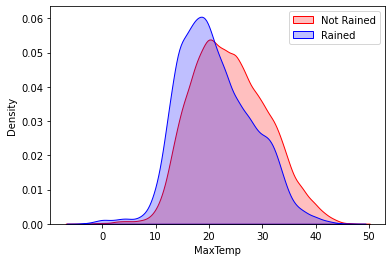

In [ ]:
# Explore MaxTemp distribution 
g = sns.kdeplot(data_nonan_labels["MaxTemp"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["MaxTemp"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["MaxTemp"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["MaxTemp"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("MaxTemp")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

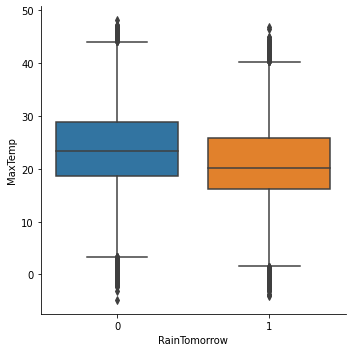

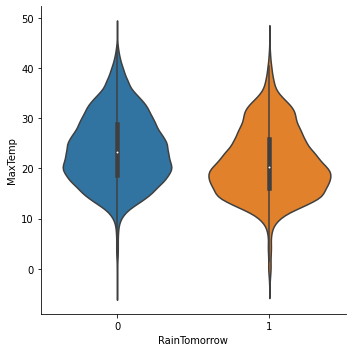

In [ ]:
g = sns.factorplot(x="RainTomorrow", y = "MaxTemp",data = data_nonan_labels, kind="box")
g = sns.factorplot(x="RainTomorrow", y = "MaxTemp",data = data_nonan_labels, kind="violin")

**Inference**: Question 

**Rainfall**

In [ ]:
# Explore Rainfall distribution 
plt.figure(figsize = (15, 10))
sns.set(font_scale = 2)
g = sns.distplot(data_nonan_labels["Rainfall"], color="r", label="Skewness : %.2f; Kurosis : %.2f"%(data_nonan_labels["Rainfall"].skew(), data_nonan_labels["Rainfall"].kurtosis()))
g.set_xlabel("Rainfall in Milli meters")

g = g.legend(loc="best")

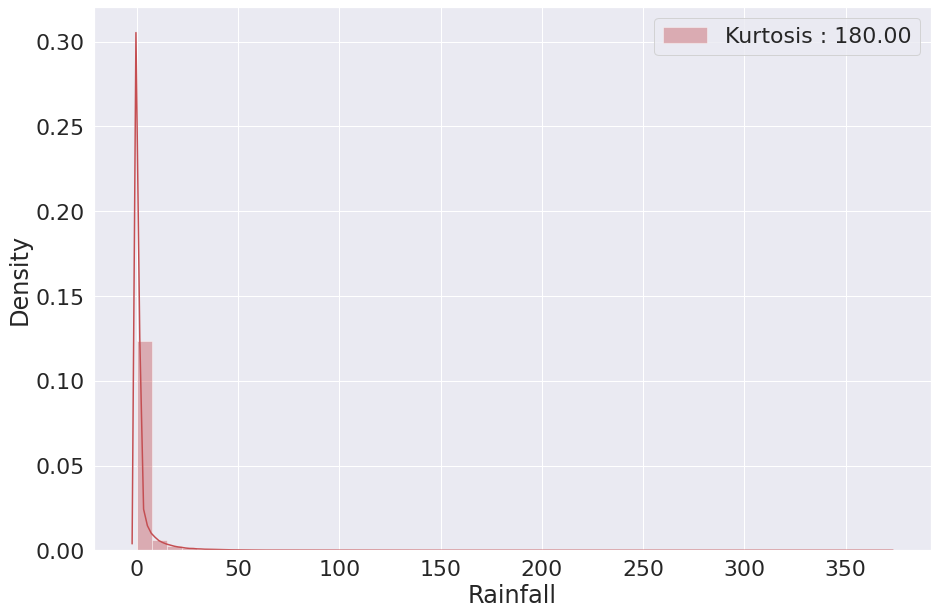

In [ ]:
# Explore Rainfall distribution 
plt.figure(figsize = (15, 10))
g = sns.distplot(data_nonan_labels["Rainfall"], color="r", label="Kurtosis : %.2f"%(data_nonan_labels["Rainfall"].kurtosis()))
g = g.legend(loc="best")

As we can see, Rainfall distribution is very skewed. This can lead to overweigth very high values in the model, even if it is scaled.

In this case, it is better to transform it with the log function to reduce this skewness.

In [ ]:
data_nonan_labels["Rainfall"] = data_nonan_labels["Rainfall"].map(lambda i: np.log(i) if i > 0 else 0)

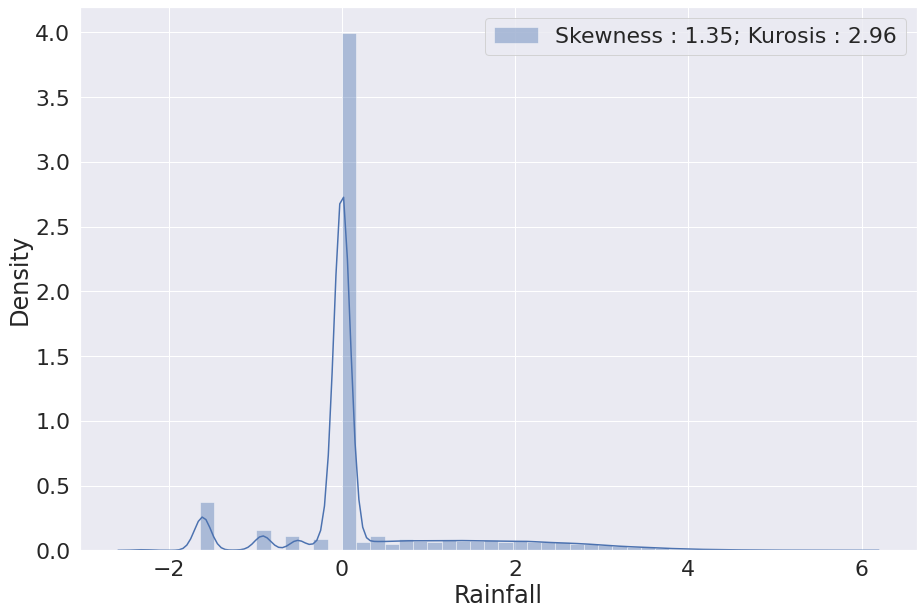

In [ ]:
# Apply log to Rainfall to reduce skewness distribution
plt.figure(figsize = (15, 10))
sns.set(font_scale = 2)

g = sns.distplot(data_nonan_labels["Rainfall"], color="b",  label="Skewness : %.2f; Kurosis : %.2f"%(data_nonan_labels["Rainfall"].skew(), data_nonan_labels["Rainfall"].kurtosis()))
g = g.legend(loc="best")

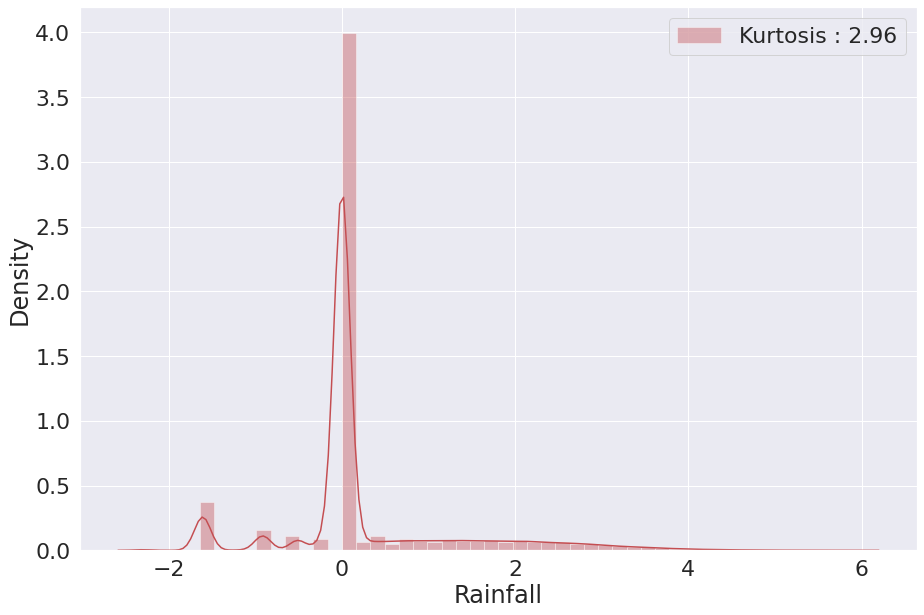

In [ ]:
# Explore Rainfall distribution 
plt.figure(figsize = (15, 10))
g = sns.distplot(data_nonan_labels["Rainfall"], color="r", label="Kurtosis : %.2f"%(data_nonan_labels["Rainfall"].kurtosis()))
g = g.legend(loc="best")

Skewness is clearly reduced after the log transformation

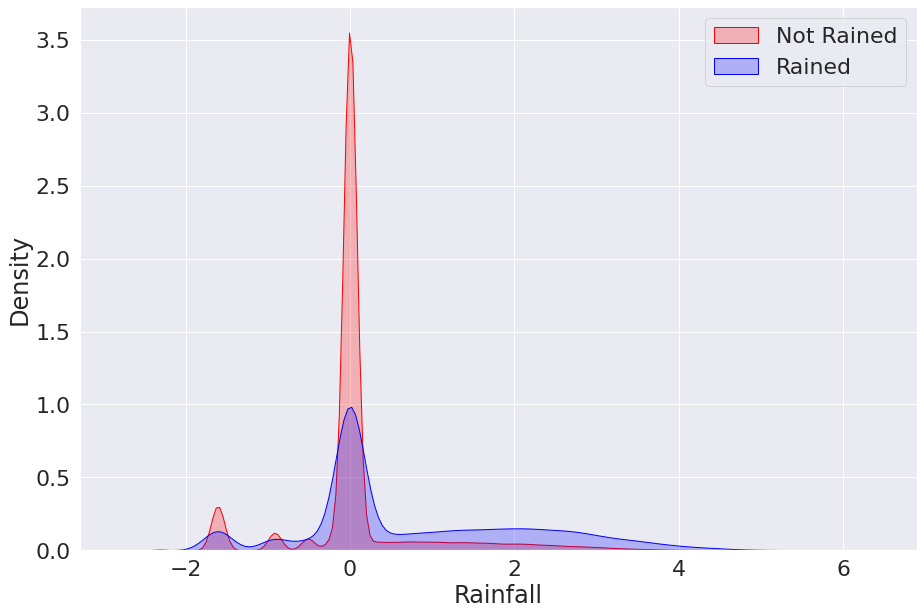

In [ ]:
# Explore Rainfall distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["Rainfall"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["Rainfall"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["Rainfall"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["Rainfall"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Rainfall")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

**Inference**: The attirbute is highly skewed with the skewness of 9.89.

**Evaporation**

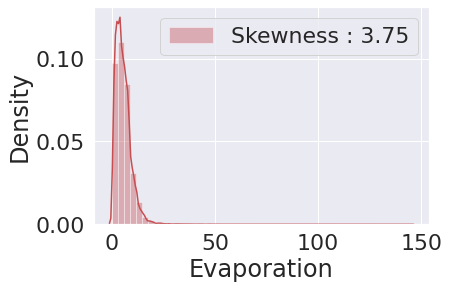

In [ ]:
g = sns.distplot(data_nonan_labels['Evaporation'], color="r", label="Skewness : %.2f"%(data_nonan_labels['Evaporation'].skew()))
g = g.legend(loc="best")

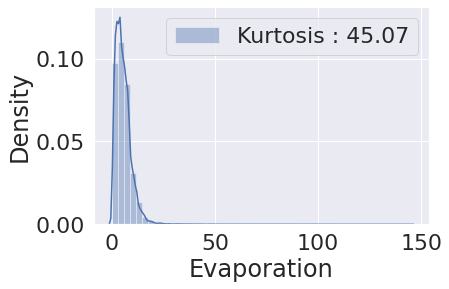

In [ ]:
g = sns.distplot(data_nonan_labels['Evaporation'], color="b", label="Kurtosis : %.2f"%(data_nonan_labels['Evaporation'].kurtosis()))
g = g.legend(loc="best")

In [ ]:
# Apply log to Evaporation to reduce skewness distribution
data_nonan_labels['Evaporation'] = data_nonan_labels['Evaporation'].map(lambda i: np.log(i) if i > 0 else 0)

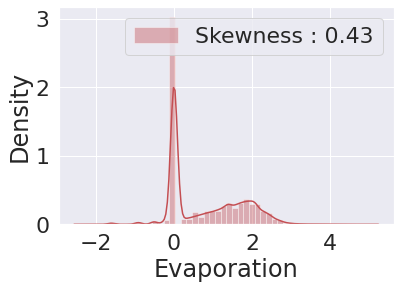

In [ ]:
g = sns.distplot(data_nonan_labels['Evaporation'], color="r", label="Skewness : %.2f"%(data_nonan_labels['Evaporation'].skew()))
g = g.legend(loc="best")

In [ ]:
g = sns.distplot(data_nonan_labels['Evaporation'], color="b", label="Kurtosis : %.2f"%(data_nonan_labels['Evaporation'].kurtosis()))
g = g.legend(loc="best")

Error in callback <function flush_figures at 0x7ff20965a0e0> (for post_execute):


KeyboardInterrupt: ignored

**Sunshine**

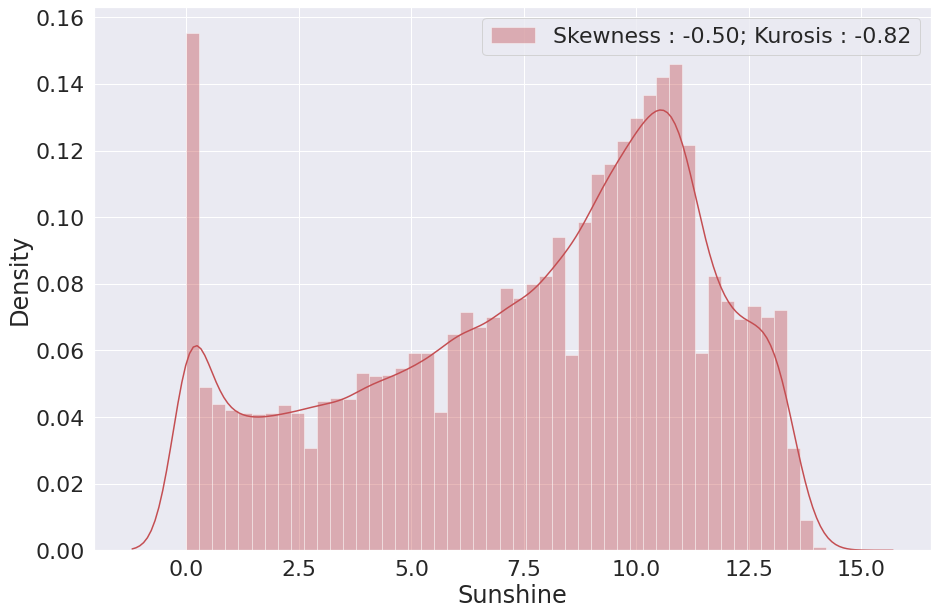

In [ ]:
# Explore Sunshine distribution 
plt.figure(figsize = (15, 10))
g = sns.distplot(data_nonan_labels["Sunshine"], color="r", label="Skewness : %.2f; Kurosis : %.2f"%(data_nonan_labels["Sunshine"].skew(), data_nonan_labels["Sunshine"].kurtosis()))
g = g.legend(loc="best")

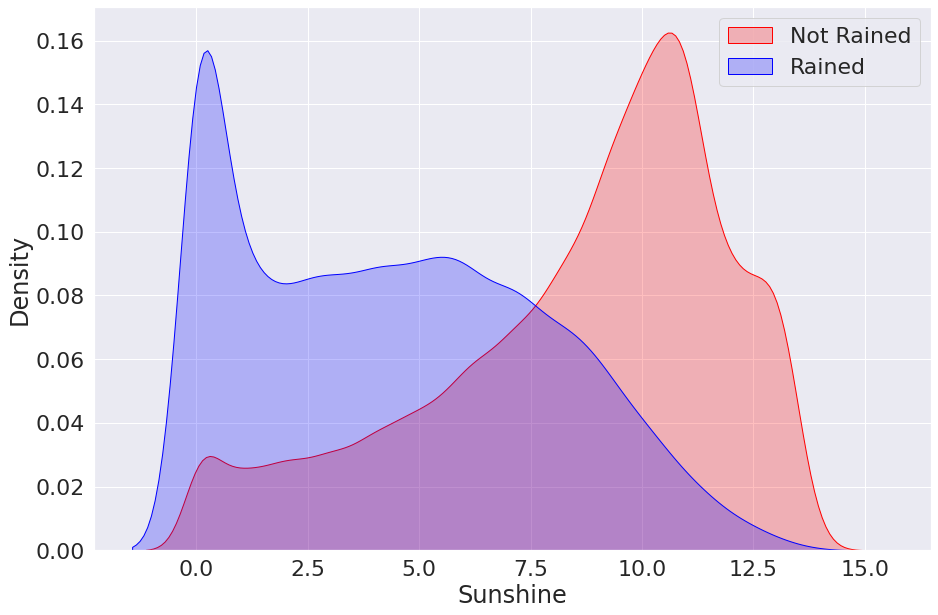

In [ ]:
# Explore Sunshine distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["Sunshine"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["Sunshine"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["Sunshine"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["Sunshine"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Sunshine")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

Not skewed but is bimodal. It makes more sense by looking at the distribution of Sunshine attribute, as we see that if the sunshine is more then the chances of rain is less.  

**WindGustDir**

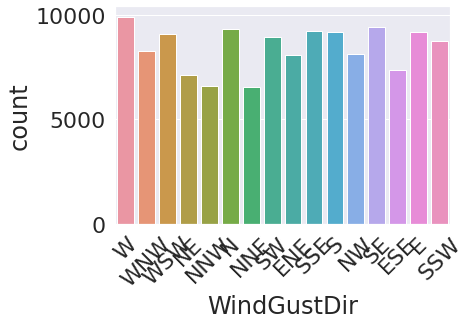

In [ ]:
g = sns.countplot(x="WindGustDir",data=data)
g = plt.setp(g.get_xticklabels(), rotation=45) 

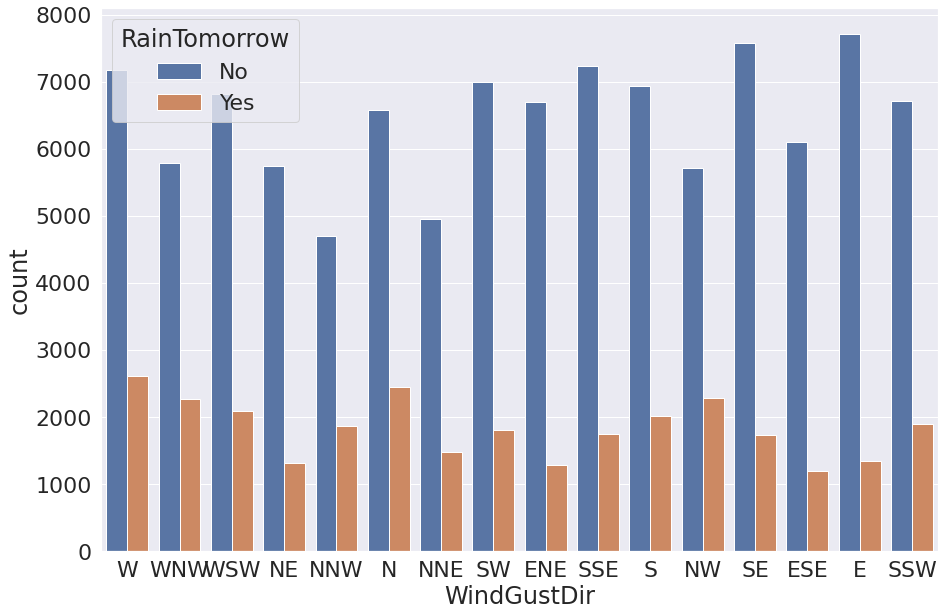

In [ ]:
plt.figure(figsize = (15, 10))

ax = sns.countplot(x="WindGustDir", hue="RainTomorrow", data=data)

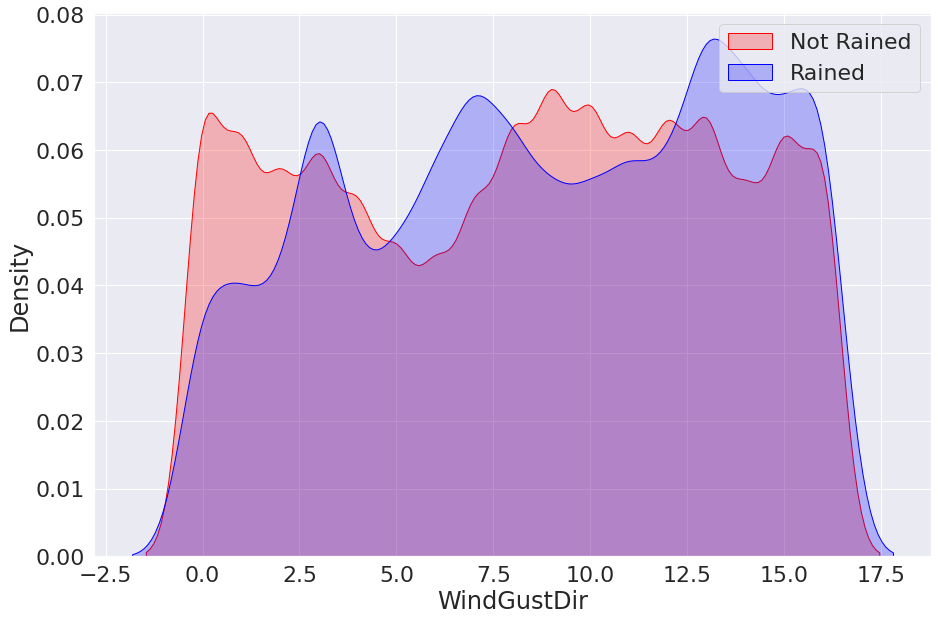

In [ ]:
# Explore WindGustDir distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["WindGustDir"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["WindGustDir"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["WindGustDir"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["WindGustDir"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("WindGustDir")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

We know If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. This looks like a uniform distribution and seems this attribute doesn't contribute to our final output.

**WindGustSpeed**

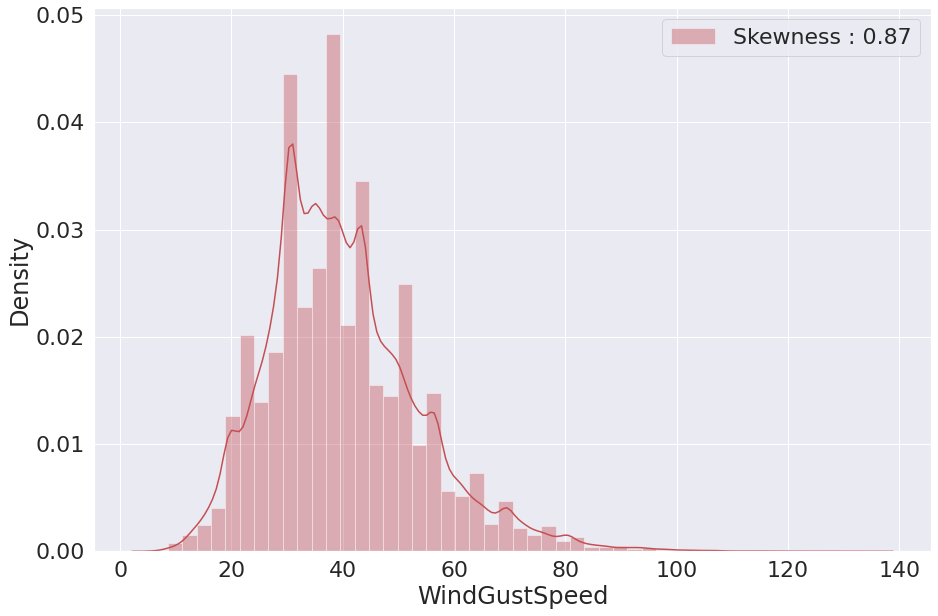

In [ ]:
# Explore WindGustDir distribution 
plt.figure(figsize = (15, 10))
g = sns.distplot(data_nonan_labels["WindGustSpeed"], color="r", label="Skewness : %.2f"%(data_nonan_labels["WindGustSpeed"].skew()))
g = g.legend(loc="best")

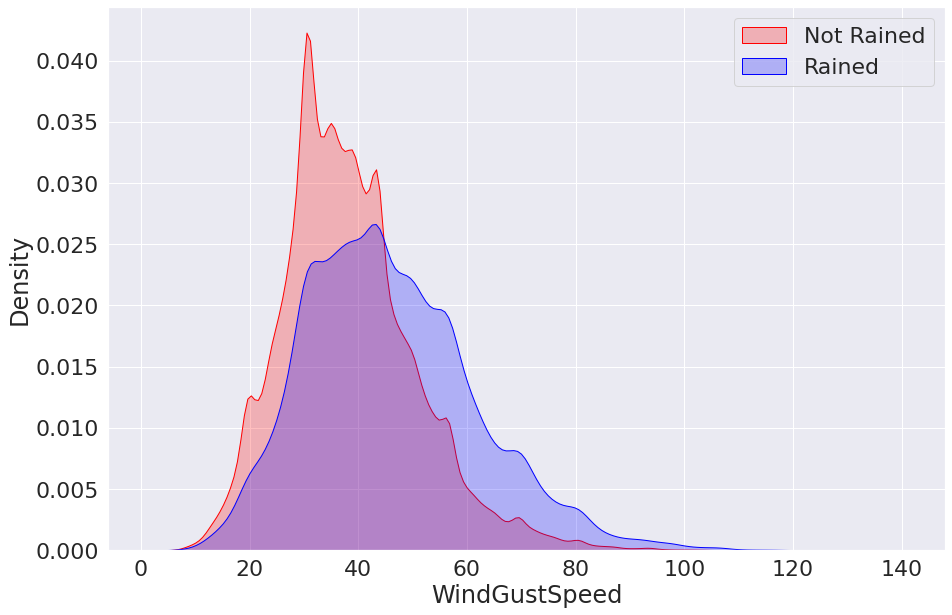

In [ ]:
# Explore WindGustSpeed distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["WindGustSpeed"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["WindGustSpeed"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["WindGustSpeed"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["WindGustSpeed"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("WindGustSpeed")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

It looks like when the wind gust speed is more, there is a chance of raining

**WindDir9am**

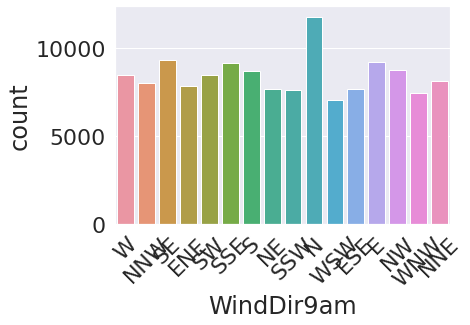

In [ ]:
g = sns.countplot(x="WindDir9am",data=data)
g = plt.setp(g.get_xticklabels(), rotation=45) 

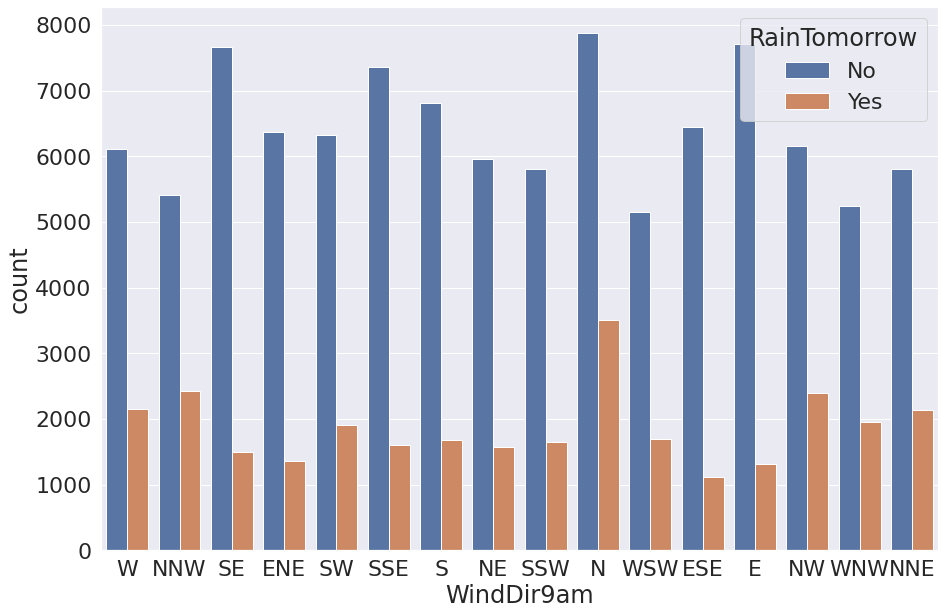

In [ ]:
plt.figure(figsize = (15, 10))

ax = sns.countplot(x="WindDir9am", hue="RainTomorrow", data=data)

**WindDir3pm**

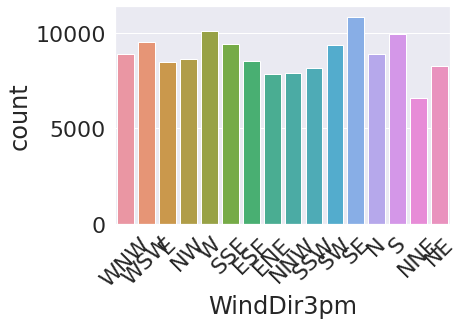

In [ ]:
g = sns.countplot(x="WindDir3pm",data=data)
g = plt.setp(g.get_xticklabels(), rotation=45) 

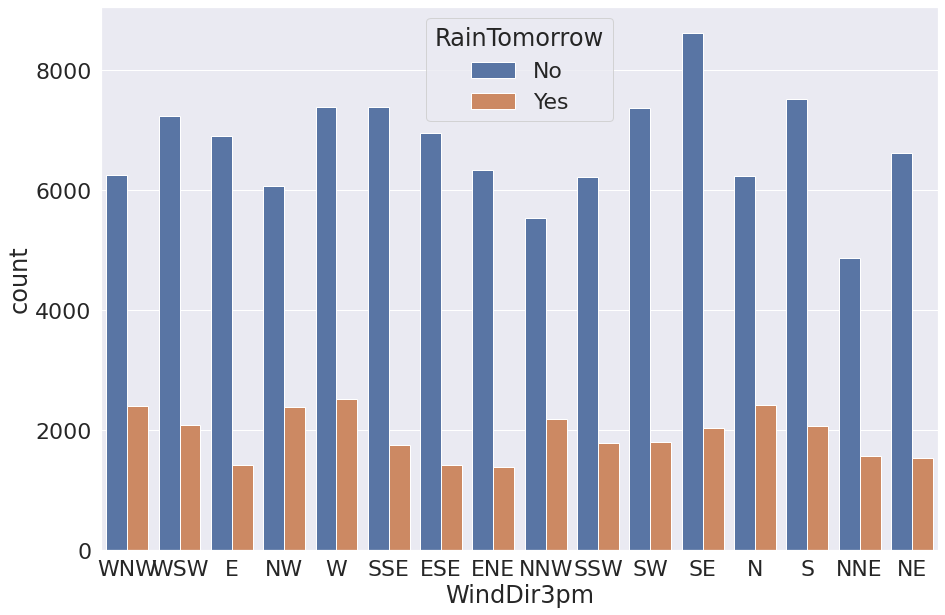

In [ ]:
plt.figure(figsize = (15, 10))

ax = sns.countplot(x="WindDir3pm", hue="RainTomorrow", data=data)

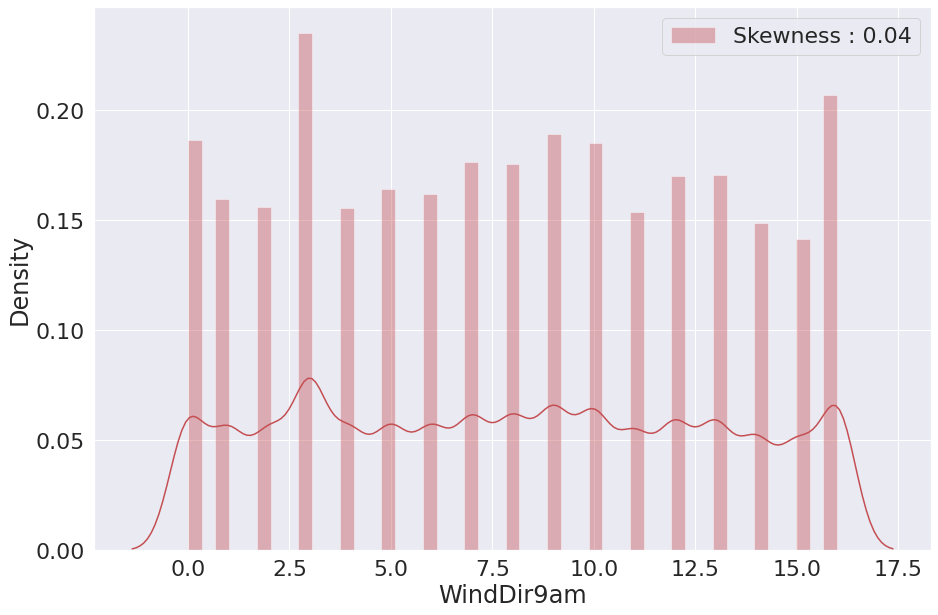

In [ ]:
# Explore WindDir9am distribution 
plt.figure(figsize = (15, 10))
g = sns.distplot(data_nonan_labels["WindDir9am"], color="r", label="Skewness : %.2f"%(data_nonan_labels["WindDir9am"].skew()))
g = g.legend(loc="best")

In [ ]:
plt.figure(figsize = (15, 10))
sns.kdeplot(
    data=data_nonan_labels, x="MinTemp", y="Evaporation", hue="RainTomorrow", fill=False,
)


In [ ]:
plt.figure(figsize = (15, 10))
sns.kdeplot(
    data=data_nonan_labels, x="MaxTemp", y="Evaporation", hue="RainTomorrow", fill=False,
)

**WindDir9am**

In [ ]:
# Explore WindDir9am distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["WindDir9am"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["WindDir9am"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["WindDir9am"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["WindDir9am"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("WindDir9am")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

**WinDir3pm**

In [ ]:
# Explore WindDir3pm distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["WindDir3pm"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["WindDir3pm"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["WindDir3pm"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["WindDir3pm"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("WindDir3pm")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

**WindSpeed9am**

In [ ]:
# Explore WindSpeed9am distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["WindSpeed9am"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["WindSpeed9am"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["WindSpeed9am"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["WindSpeed9am"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("WindSpeed9am")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

**WindSpeed3pm**

In [ ]:
# Explore WindSpeed3pm distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["WindSpeed3pm"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["WindSpeed3pm"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["WindSpeed3pm"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["WindSpeed3pm"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("WindSpeed3pm")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

**Humidity9am**

In [ ]:
# Explore Humidity9am distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["Humidity9am"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["Humidity9am"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["Humidity9am"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["Humidity9am"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Humidity9am")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

**Humidity3pm**

In [ ]:
# Explore Humidity3pm distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["Humidity3pm"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["Humidity3pm"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["Humidity3pm"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["Humidity3pm"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Humidity3pm")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

**Pressure9am**

In [ ]:
# Explore Pressure9am distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["Pressure9am"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["Pressure9am"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["Pressure9am"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["Pressure9am"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Pressure9am")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

**Pressure3pm**

In [ ]:
# Explore Pressure3pm distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["Pressure3pm"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["Pressure3pm"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["Pressure3pm"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["Pressure3pm"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Pressure3pm")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

**Cloud9am**

In [ ]:
# Explore Cloud9am distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["Cloud9am"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["Cloud9am"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["Cloud9am"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["Cloud9am"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Cloud9am")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

**Cloud3pm**

In [ ]:
# Explore Cloud3pm distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["Cloud3pm"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["Cloud3pm"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["Cloud3pm"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["Cloud3pm"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Cloud3pm")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

**Temp9am**

In [ ]:
# Explore Temp9am distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["Temp9am"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["Temp9am"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["Temp9am"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["Temp9am"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Temp9am")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

**Temp3pm**

In [ ]:
# Explore Temp3pm distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["Temp3pm"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["Temp3pm"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["Temp3pm"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["Temp3pm"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Temp3pm")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

**Rain Today**

In [ ]:
# Explore RainToday distribution 
plt.figure(figsize = (15, 10))
g = sns.kdeplot(data_nonan_labels["RainToday"][(data_nonan_labels["RainTomorrow"] == 0) & (data_nonan_labels["RainToday"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data_nonan_labels["RainToday"][(data_nonan_labels["RainTomorrow"] == 1) & (data_nonan_labels["RainToday"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("RainToday")
g.set_ylabel("Density")
g = g.legend(["Not Rained","Rained"])

In [ ]:
# Explore RainToday vs RainTomorrow 
g = sns.factorplot(x="RainToday", y="RainTomorrow",  data=data_nonan_labels,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("RainTomorrow")

In [ ]:
data_nonan_labels.info()